# HMS - Harmful Brain Activity Classification

### IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## LOADING THE DATASET

In [3]:
BASE_DIR = "/home/m1/23CS60R76/MTP_Works/HMS_Brain_Activity/Harmful_Brain_Activity/"

In [4]:
df = pd.read_csv(f"{BASE_DIR}train.csv")
df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


### BASIC CHECKS

In [5]:
df.tail()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0
106799,351917269,10,20.0,2147388374,10,20.0,3642716176,10351,LRDA,0,0,0,3,0,0


In [6]:
df.shape

(106800, 15)

In [7]:
df.columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote'],
      dtype='object')

## DATA ANALYSIS

1. **`eeg_id`**: Unique identifier for the entire EEG recording. It represents a specific EEG session or recording from a patient.

2. **`eeg_sub_id`**: An ID for the specific 50-second long subsample to which the row's labels apply. This column helps identify a particular subset or segment within the larger EEG recording.

3. **`eeg_label_offset_seconds`**: The time between the beginning of the consolidated EEG and the subsample. It indicates the time offset for the EEG subsample within the entire EEG recording.

4. **`spectrogram_id`**: Unique identifier for the entire EEG recording, similar to `eeg_id`. It is related to the spectrogram data.

5. **`spectrogram_sub_id`**: An ID for the specific 10-minute subsample to which the row's labels apply. This corresponds to a subset within the larger spectrogram data.

6. **`spectrogram_label_offset_seconds`**: The time between the beginning of the consolidated spectrogram and the subsample. It indicates the time offset for the spectrogram subsample within the entire spectrogram recording.

7. **`label_id`**: An ID for this set of labels. It helps distinguish different sets of labels within the dataset.

8. **`patient_id`**: An ID for the patient who donated the data. It uniquely identifies each patient.

9. **`expert_consensus`**: The consensus annotator label for convenience. This column may provide a summary or agreement among expert annotators regarding the type of brain activity in the given subsample.

10. **`seizure_vote`**, **`lpd_vote`**, **`gpd_vote`**, **`lrda_vote`**, **`grda_vote`**, **`other_vote`**: These columns represent the count of annotator votes for specific brain activity classes. The classes are:
    - `seizure_vote`: Count of votes for seizure.
    - `lpd_vote`: Count of votes for lateralized periodic discharges.
    - `gpd_vote`: Count of votes for generalized periodic discharges.
    - `lrda_vote`: Count of votes for lateralized rhythmic delta activity.
    - `grda_vote`: Count of votes for generalized rhythmic delta activity.
    - `other_vote`: Count of votes for other types of brain activity.

11. **Target Variable**: The target variable in this dataset is the actual brain activity class for each subsample. It could be any of the following:
    - Seizure (`seizure_vote`): Represents the count of votes for seizure.
    - Lateralized Periodic Discharges (`lpd_vote`): Represents the count of votes for lateralized periodic discharges.
    - Generalized Periodic Discharges (`gpd_vote`): Represents the count of votes for generalized periodic discharges.
    - Lateralized Rhythmic Delta Activity (`lrda_vote`): Represents the count of votes for lateralized rhythmic delta activity.
    - Generalized Rhythmic Delta Activity (`grda_vote`): Represents the count of votes for generalized rhythmic delta activity.
    - Other (`other_vote`): Represents the count of votes for other types of brain activity.

The target variable is the type of brain activity class (seizure, lpd, gpd, lrda, grda, other), and the goal of the competition or analysis is likely to predict or classify the correct brain activity class for each EEG subsample.

In [8]:
df.isnull().sum()

eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
dtype: int64

In [9]:
df.nunique()

eeg_id                               17089
eeg_sub_id                             743
eeg_label_offset_seconds              1502
spectrogram_id                       11138
spectrogram_sub_id                    1022
spectrogram_label_offset_seconds      4686
label_id                            106800
patient_id                            1950
expert_consensus                         6
seizure_vote                            18
lpd_vote                                19
gpd_vote                                17
lrda_vote                               16
grda_vote                               16
other_vote                              26
dtype: int64

In [10]:
object_columns = df.select_dtypes(include=['object', 'bool']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['expert_consensus'], dtype='object')

Numerical type columns:
Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote',
       'grda_vote', 'other_vote'],
      dtype='object')


In [11]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype in ['object', 'bool']:
            if df[column].nunique() < 15:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [12]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [13]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['expert_consensus']
Non-Categorical Features: []
Discrete Features: []
Continuous Features: ['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id', 'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id', 'patient_id', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


In [14]:
for i in categorical:
    print(i, ':')
    print(df[i].unique())
    print()

expert_consensus :
['Seizure' 'GPD' 'LRDA' 'Other' 'GRDA' 'LPD']



In [15]:
for i in categorical:
    print(i, ':')
    print(df[i].value_counts())
    print()

expert_consensus :
Seizure    20933
GRDA       18861
Other      18808
GPD        16702
LRDA       16640
LPD        14856
Name: expert_consensus, dtype: int64



## EXPLORATORY DATA ANALYSIS

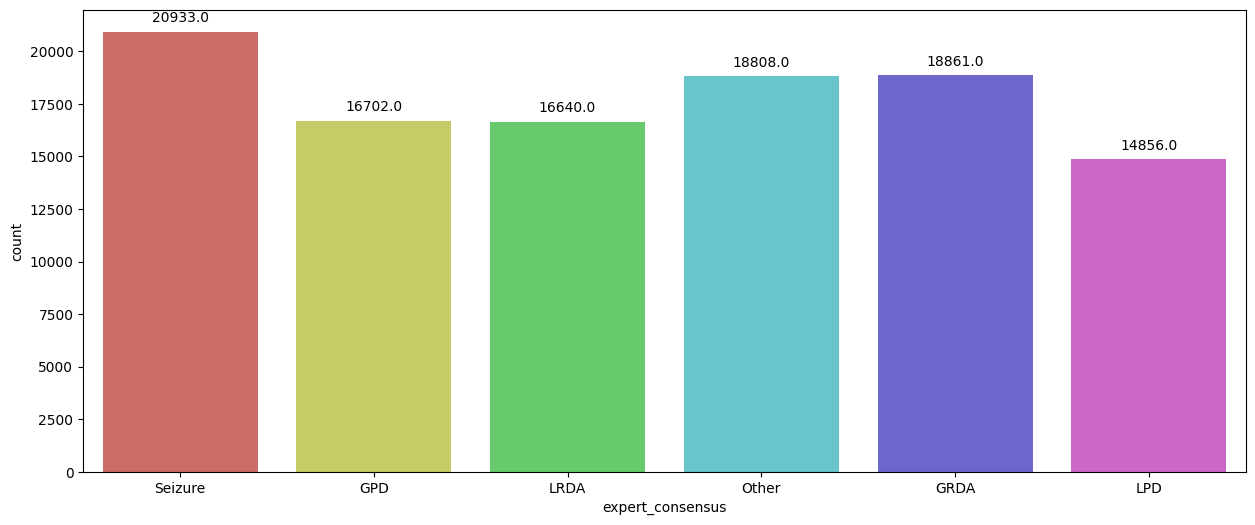

In [16]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()

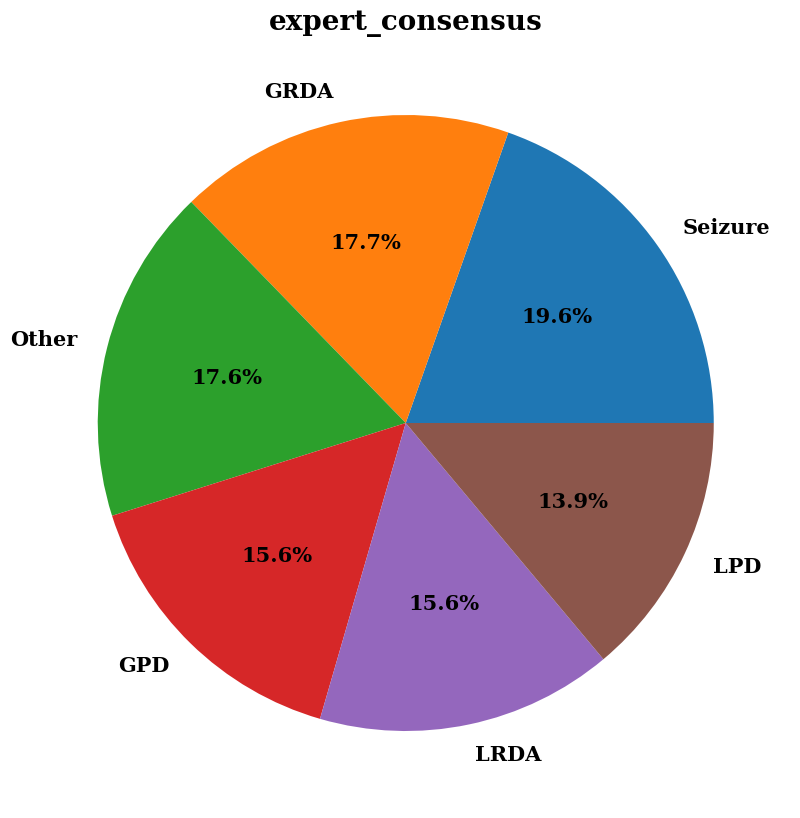

In [17]:
for i in categorical:
    plt.figure(figsize=(20,10))
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.1f%%', textprops={'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
    hfont = {'fontname':'serif', 'weight': 'bold'}
    plt.title(i, size=20, **hfont)
    plt.show()

In [18]:
votes_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
df_votes = df[votes_columns].melt(var_name='Brain Activity', value_name='Votes')

1. **`votes_columns`**: This is a list containing the names of columns in your original DataFrame (`df`) that represent the counts of votes for different brain activity classes. Each element in the list corresponds to a specific brain activity class.

2. **`df_votes`**: This line creates a new DataFrame (`df_votes`) by selecting only the columns specified in `votes_columns` from the original DataFrame (`df`). The selected columns are essentially the counts of votes for different brain activity classes.

3. **`.melt(var_name='Brain Activity', value_name='Votes')`**: This part of the code transforms the DataFrame from wide format to long format using the `melt` function. It takes the selected columns (`votes_columns`) and "melts" or unpivots them, creating two new columns:
   - `Brain Activity`: This column stores the variable names from the original DataFrame (`df`) that represent different brain activity classes (e.g., 'seizure_vote', 'lpd_vote', etc.).
   - `Votes`: This column stores the corresponding values (vote counts) for each brain activity class.

In [19]:
df_votes

,Brain Activity,Votes
0,seizure_vote,3
1,seizure_vote,3
2,seizure_vote,3
3,seizure_vote,3
4,seizure_vote,3
...,...,...
640795,other_vote,0
640796,other_vote,0
640797,other_vote,0
640798,other_vote,0


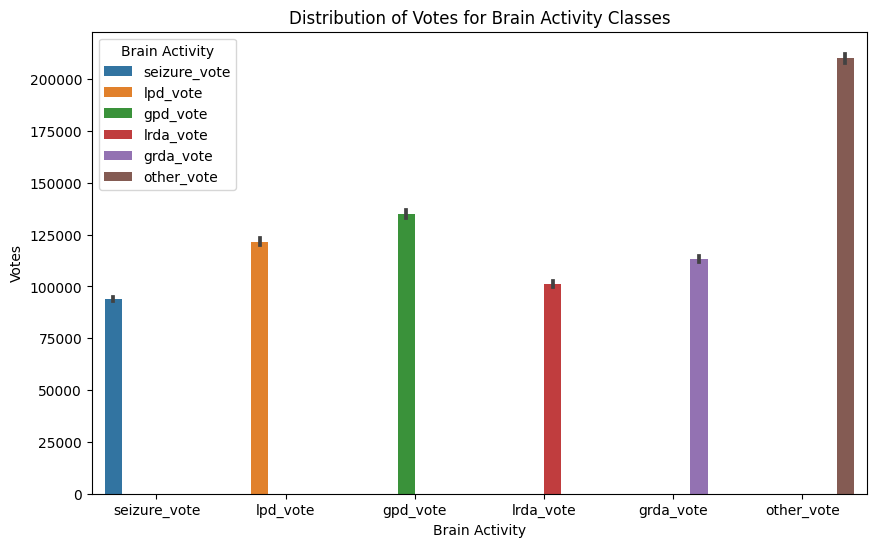

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Brain Activity', y='Votes', hue='Brain Activity', data=df_votes, estimator=sum)
plt.title('Distribution of Votes for Brain Activity Classes')
plt.show()

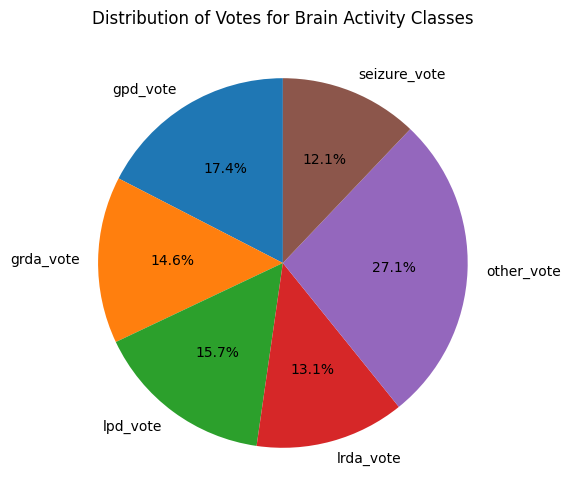

In [22]:
votes_sum = df_votes.groupby('Brain Activity')['Votes'].sum()

plt.figure(figsize=(10, 6))
plt.pie(votes_sum, labels=votes_sum.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Votes for Brain Activity Classes')
plt.show()

In [20]:
df_vote_columns = df[votes_columns]

In [21]:
pivot_table_continuous = pd.pivot_table(df, values=continuous, index='expert_consensus', aggfunc='mean', fill_value=0)
pivot_table_continuous

,eeg_id,eeg_label_offset_seconds,eeg_sub_id,gpd_vote,grda_vote,label_id,lpd_vote,lrda_vote,other_vote,patient_id,seizure_vote,spectrogram_id,spectrogram_label_offset_seconds,spectrogram_sub_id
expert_consensus,,,,,,,,,,,,,,
GPD,2.112607e+09,271.789007,60.594001,7.136630,0.327685,2.137788e+09,0.465932,0.056161,0.977967,30894.480362,1.073823,1.012988e+09,681.736199,75.243384
GRDA,2.122264e+09,164.003181,34.889295,0.196119,4.516569,2.139416e+09,0.101161,0.252214,0.974286,31341.035947,0.030751,1.115632e+09,303.706590,44.237951
LPD,2.009430e+09,105.365778,14.422052,0.275714,0.110057,2.135262e+09,6.303177,0.652329,0.982970,33153.806745,0.272079,1.081675e+09,1248.156637,67.645665
LRDA,2.060360e+09,111.167668,41.686238,0.076082,0.437500,2.142999e+09,0.469712,4.535697,1.351863,33981.688041,0.141286,1.046095e+09,516.924760,61.317127
Other,2.148688e+09,25.629307,3.607295,0.291631,0.702573,2.143698e+09,0.471874,0.507337,7.204275,33263.351287,0.155997,1.073661e+09,346.593258,13.892333
Seizure,2.144307e+09,55.406105,7.715951,0.064587,0.015860,2.147165e+09,0.076482,0.041848,0.128649,31499.771652,3.149620,1.067833e+09,229.519753,14.002436


1. **eeg_id:**
   - GPD has an average EEG recording identifier of approximately 2.1126e+09.
   - Other classes have varying average EEG recording identifiers.

   **Interpretation:** The average EEG recording identifier may not provide direct insights into the characteristics of brain activity classes.

2. **eeg_label_offset_seconds:**
   - GPD has an average EEG label offset of approximately 271.79 seconds.
   - Other classes have varying average EEG label offsets.

   **Interpretation:** GPD tends to have EEG signals labeled around 271.79 seconds, suggesting a specific temporal pattern associated with this class.

3. **spectrogram_id:**
   - GPD has an average spectrogram identifier of approximately 1.01299e+09.
   - Other classes have varying average spectrogram identifiers.

   **Interpretation:** The average spectrogram identifier for GPD may indicate a specific pattern or set of characteristics in the spectrogram associated with this class.

4. **seizure_vote:**
   - Seizure has the highest average vote count, indicating a higher level of agreement among annotators for this class.
   - Other classes have lower average vote counts.

   **Interpretation:** Seizure tends to have a higher level of agreement among annotators, suggesting that it might be a more easily identifiable brain activity class compared to others.

These interpretations provide a high-level understanding of the average characteristics associated with different brain activity classes based on the provided features. It's important to note that further in-depth analysis and domain expertise may be required to draw more specific conclusions about the significance of these averages in the context of EEG signal processing and brain activity classification.

In [22]:
df['Brain Activity'] = df[votes_columns].idxmax(axis=1).apply(lambda x: x.replace('_vote', ''))

In [23]:
df

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,Brain Activity
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,seizure
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0,seizure
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0,seizure
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0,seizure
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0,seizure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0,lrda
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0,lrda
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0,lrda
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0,lrda


In [24]:
grouped_continuous = df.groupby('eeg_id')[continuous].mean().reset_index(drop=True)
grouped_continuous

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,5.686570e+05,1.5,8.500000,7.895773e+08,1.5,8.500000,2.176284e+09,20654.0,0.0,0.0,3.0,0.0,2.0,7.0
1,5.829990e+05,5.0,17.454545,1.552638e+09,5.0,17.454545,1.677750e+09,20230.0,0.0,12.0,0.0,1.0,0.0,1.0
2,6.423820e+05,0.5,12.000000,1.496020e+07,12.5,1020.000000,2.903413e+09,5955.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7.517900e+05,0.0,0.000000,6.187284e+08,4.0,908.000000,2.898467e+09,38549.0,0.0,0.0,1.0,0.0,0.0,0.0
4,7.787050e+05,0.0,0.000000,5.229632e+07,0.0,0.000000,3.255875e+09,40955.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17084,4.293354e+09,0.0,0.000000,1.188114e+09,0.0,0.000000,4.472442e+08,16610.0,0.0,0.0,0.0,0.0,1.0,1.0
17085,4.293843e+09,0.0,0.000000,1.549503e+09,0.0,0.000000,1.618953e+09,15065.0,0.0,0.0,0.0,0.0,1.0,1.0
17086,4.294455e+09,0.0,0.000000,2.105480e+09,0.0,0.000000,4.695264e+08,56.0,0.0,0.0,0.0,0.0,0.0,1.0
17087,4.294859e+09,2.0,5.600000,6.572992e+08,2.0,5.600000,2.652198e+09,4312.0,0.0,0.0,0.0,0.0,1.0,14.0


In [25]:
targets = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

In [26]:
total_votes_per_pat = df.groupby('patient_id')[targets].sum().sum(axis=1)
normalized_votes = df.groupby('patient_id')[targets].sum().div(total_votes_per_pat, axis=0)
mean_vote_ratio = normalized_votes.mean()
print( mean_vote_ratio )

seizure_vote    0.310718
lpd_vote        0.046279
gpd_vote        0.051885
lrda_vote       0.081796
grda_vote       0.231471
other_vote      0.277851
dtype: float64


In [27]:
target_eeg_id = 1000913311
df_filtered = df[df['eeg_id'] == target_eeg_id]
df_filtered

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,Brain Activity
9529,1000913311,0,0.0,175871552,0,0.0,3905268514,59743,Other,0,0,0,0,0,2,other


In [28]:
df_filtered = pd.read_parquet(f'{BASE_DIR}/train_eegs/1000913311.parquet')

In [29]:
df_filtered

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-105.849998,-89.230003,-79.459999,-49.230000,-99.730003,-87.769997,-53.330002,-50.740002,-32.250000,-42.099998,-43.270000,-88.730003,-74.410004,-92.459999,-58.930000,-75.739998,-59.470001,8.210000,66.489998,1404.930054
1,-85.470001,-75.070000,-60.259998,-38.919998,-73.080002,-87.510002,-39.680000,-35.630001,-76.839996,-62.740002,-43.040001,-68.629997,-61.689999,-69.320000,-35.790001,-58.900002,-41.660000,196.190002,230.669998,3402.669922
2,8.840000,34.849998,56.430000,67.970001,48.099998,25.350000,80.250000,48.060001,6.720000,37.880001,61.000000,16.580000,55.060001,45.020000,70.529999,47.820000,72.029999,-67.180000,-171.309998,-3565.800049
3,-56.320000,-37.279999,-28.100000,-2.820000,-43.430000,-35.049999,3.910000,-12.660000,8.650000,3.830000,4.180000,-51.900002,-21.889999,-41.330002,-11.580000,-27.040001,-11.730000,-91.000000,-81.190002,-1280.930054
4,-110.139999,-104.519997,-96.879997,-70.250000,-111.660004,-114.430000,-71.830002,-61.919998,-76.150002,-79.779999,-67.480003,-99.029999,-93.610001,-104.410004,-70.070000,-89.250000,-77.260002,155.729996,264.850006,4325.370117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-45.540001,-26.459999,-23.209999,-25.250000,-21.559999,-36.549999,10.730000,-16.290001,-55.919998,-28.670000,-29.770000,-22.000000,3.710000,8.470000,0.480000,9.950000,33.959999,110.510002,58.599998,301.239990
9996,-26.860001,4.350000,7.410000,7.830000,5.260000,7.750000,50.130001,4.150000,1.720000,22.100000,7.150000,-6.820000,38.070000,32.880001,21.990000,32.990002,60.209999,-156.949997,-275.929993,-4634.799805
9997,-133.759995,-111.190002,-119.180000,-105.760002,-130.039993,-104.059998,-68.290001,-86.480003,-57.130001,-68.830002,-95.839996,-107.540001,-86.449997,-94.099998,-97.050003,-86.339996,-68.040001,-14.880000,66.440002,1667.800049
9998,-78.889999,-59.660000,-60.770000,-59.810001,-63.020000,-60.020000,-20.690001,-42.820000,-68.669998,-54.740002,-62.810001,-52.869999,-34.099998,-31.500000,-37.810001,-32.259998,-10.870000,137.559998,193.839996,2743.379883


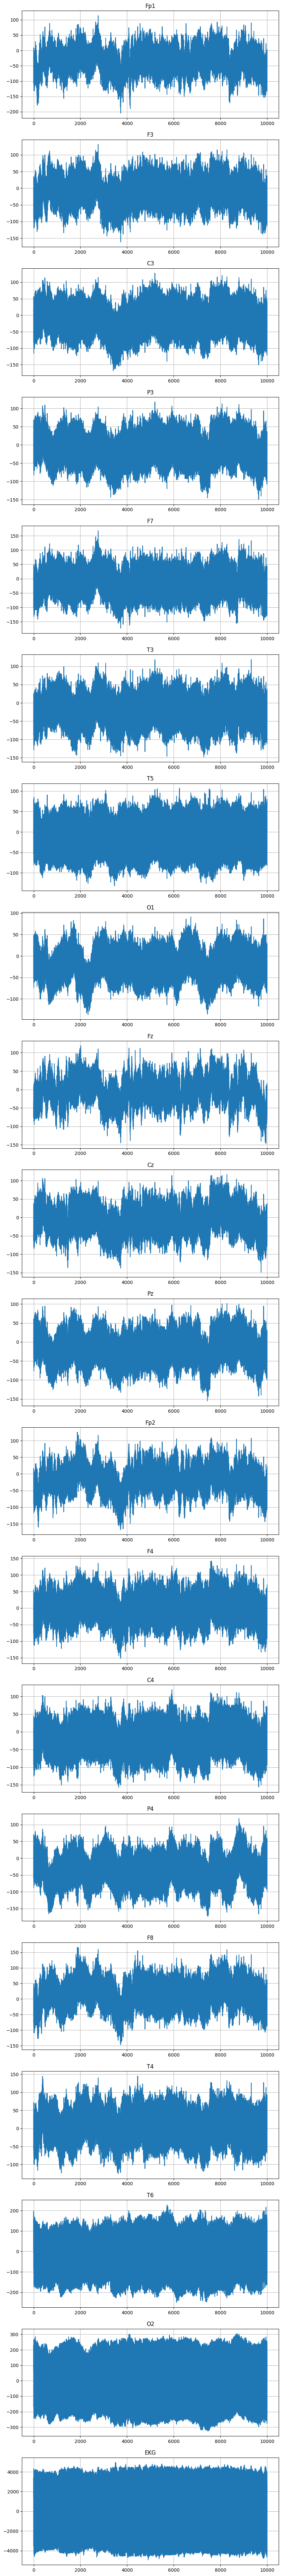

In [30]:
fig, ax = plt.subplots(20, figsize=(10, 100))

for i, column in enumerate(df_filtered.columns):
    ax[i].plot(df_filtered.index, df_filtered[column], label=column)
    ax[i].grid(True)
    ax[i].set_title(str(column))

plt.show()

Data has a lot of peaks and troughs, indicating a high variation
The scale of most of the plots ranging from -200 to 100, excluding EKG chart
The line seems to fluctuate above and below a central value, which seems to be around zero value

In [31]:
df_filtered.shape

(10000, 20)

In [32]:
df_filtered.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG'],
      dtype='object')

The list of labels you provided appears to represent different electrode locations in an electroencephalography (EEG) recording setup. Each label corresponds to a specific position on the scalp where electrodes are placed to capture electrical activity from different regions of the brain. Let's break down each label:

1. **Fp1 and Fp2:**
   - These are frontal polar electrodes.
   - Positioned on the forehead, they capture electrical activity from the frontal lobes, which are associated with cognitive functions, decision-making, and personality.

2. **F3, F4, F7, and F8:**
   - These electrodes are located in the frontal region.
   - They capture electrical signals from the frontal lobes, contributing to the analysis of cognitive processes and emotional states.

3. **C3 and C4:**
   - These are central electrodes.
   - Positioned over the central region of the scalp, they record activity from the central sulcus area, involved in motor control and sensory processing.

4. **P3 and P4:**
   - These electrodes are located in the parietal region.
   - They capture signals related to sensory processing, spatial awareness, and interpretation of visual information.

5. **Fz, Cz, and Pz:**
   - These are midline electrodes located at the vertex (top) of the head.
   - Fz captures activity from the frontal midline, Cz from the central midline, and Pz from the parietal midline. These are important for analyzing midline brain functions.

6. **T3, T4, T5, and T6:**
   - These electrodes are positioned in the temporal region.
   - They record electrical activity from the temporal lobes, which are involved in auditory processing, memory, and language.

7. **O1 and O2:**
   - These electrodes are located in the occipital region.
   - They capture signals from the occipital lobes, primarily responsible for visual processing.

8. **EKG:**
   - This electrode records electrocardiogram (EKG or ECG) signals from the heart.
   - While not directly related to brain activity, it is often included in EEG setups to monitor cardiac activity, allowing for correlation with potential physiological effects on the EEG.

These electrode locations collectively provide a comprehensive view of brain activity, enabling the analysis of different cognitive and sensory functions. EEG recordings from these electrodes help researchers and clinicians understand brain dynamics and detect abnormalities in various neurological conditions.

In [33]:
df1 = df_filtered

In [34]:
df1['Brain Activity'] = 'other'

In [35]:
df1

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,...,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG,Brain Activity
0,-105.849998,-89.230003,-79.459999,-49.230000,-99.730003,-87.769997,-53.330002,-50.740002,-32.250000,-42.099998,...,-88.730003,-74.410004,-92.459999,-58.930000,-75.739998,-59.470001,8.210000,66.489998,1404.930054,other
1,-85.470001,-75.070000,-60.259998,-38.919998,-73.080002,-87.510002,-39.680000,-35.630001,-76.839996,-62.740002,...,-68.629997,-61.689999,-69.320000,-35.790001,-58.900002,-41.660000,196.190002,230.669998,3402.669922,other
2,8.840000,34.849998,56.430000,67.970001,48.099998,25.350000,80.250000,48.060001,6.720000,37.880001,...,16.580000,55.060001,45.020000,70.529999,47.820000,72.029999,-67.180000,-171.309998,-3565.800049,other
3,-56.320000,-37.279999,-28.100000,-2.820000,-43.430000,-35.049999,3.910000,-12.660000,8.650000,3.830000,...,-51.900002,-21.889999,-41.330002,-11.580000,-27.040001,-11.730000,-91.000000,-81.190002,-1280.930054,other
4,-110.139999,-104.519997,-96.879997,-70.250000,-111.660004,-114.430000,-71.830002,-61.919998,-76.150002,-79.779999,...,-99.029999,-93.610001,-104.410004,-70.070000,-89.250000,-77.260002,155.729996,264.850006,4325.370117,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-45.540001,-26.459999,-23.209999,-25.250000,-21.559999,-36.549999,10.730000,-16.290001,-55.919998,-28.670000,...,-22.000000,3.710000,8.470000,0.480000,9.950000,33.959999,110.510002,58.599998,301.239990,other
9996,-26.860001,4.350000,7.410000,7.830000,5.260000,7.750000,50.130001,4.150000,1.720000,22.100000,...,-6.820000,38.070000,32.880001,21.990000,32.990002,60.209999,-156.949997,-275.929993,-4634.799805,other
9997,-133.759995,-111.190002,-119.180000,-105.760002,-130.039993,-104.059998,-68.290001,-86.480003,-57.130001,-68.830002,...,-107.540001,-86.449997,-94.099998,-97.050003,-86.339996,-68.040001,-14.880000,66.440002,1667.800049,other
9998,-78.889999,-59.660000,-60.770000,-59.810001,-63.020000,-60.020000,-20.690001,-42.820000,-68.669998,-54.740002,...,-52.869999,-34.099998,-31.500000,-37.810001,-32.259998,-10.870000,137.559998,193.839996,2743.379883,other


In [36]:
electrodes = ['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG']

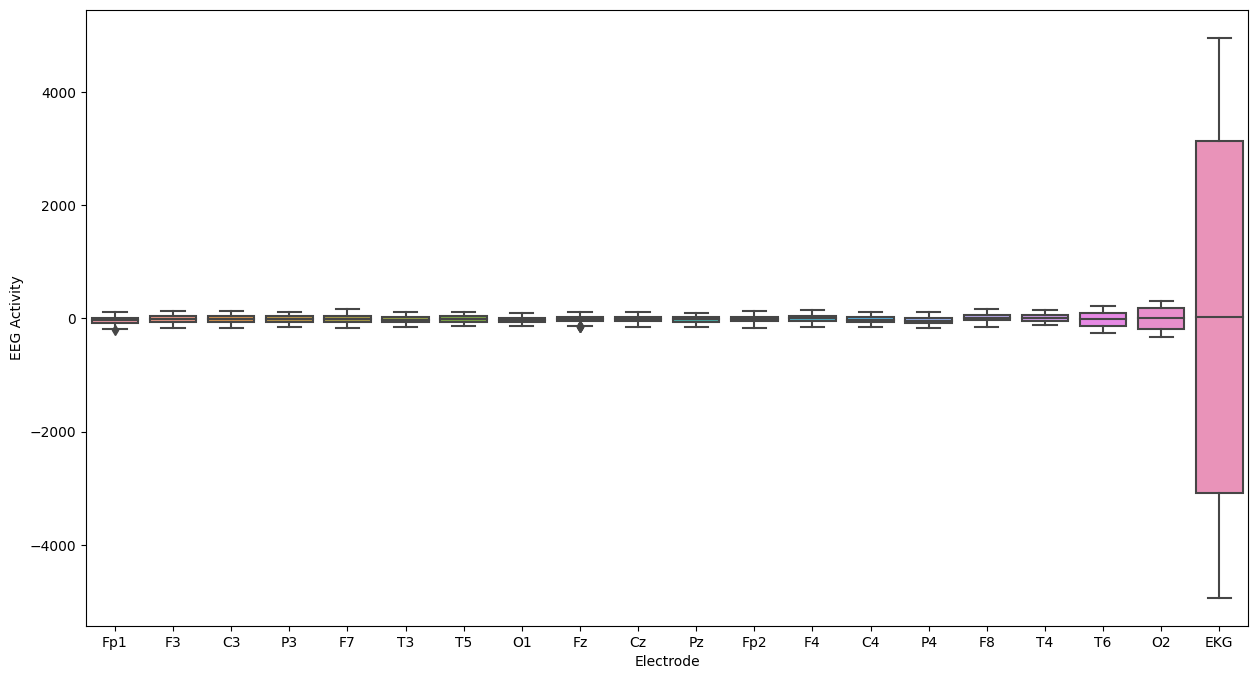

In [37]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[electrodes])
plt.xlabel('Electrode')
plt.ylabel('EEG Activity')
plt.show()

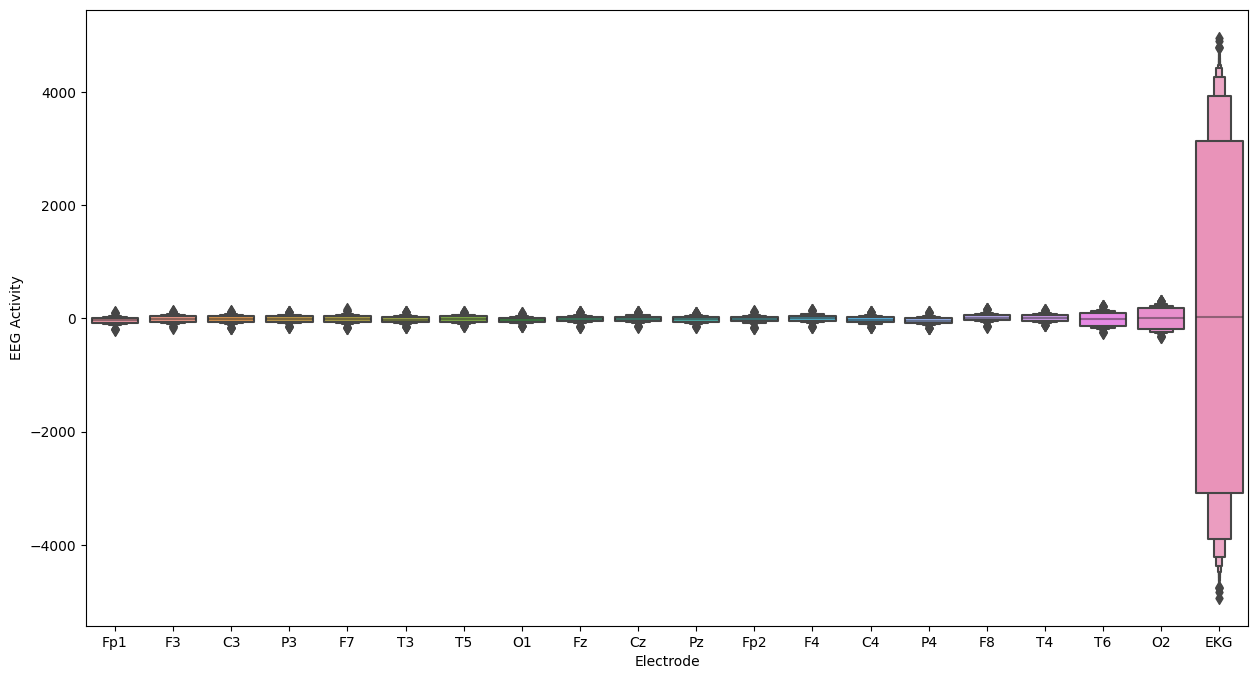

In [38]:
plt.figure(figsize=(15, 8))
sns.boxenplot(data=df1[electrodes])
plt.xlabel('Electrode')
plt.ylabel('EEG Activity')
plt.show()

In [39]:
df.columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote', 'Brain Activity'],
      dtype='object')

In [40]:
unique_eeg_ids = df.drop_duplicates(subset='Brain Activity')['eeg_id'].tolist()
print(unique_eeg_ids)

[1628180742, 2277392603, 722738444, 1202099836, 2578018731, 736446371]


In [41]:
eeg_activity_dict = {}

for eeg_id in unique_eeg_ids:
    subset_df = df[df['eeg_id'] == eeg_id]

    unique_brain_activity = subset_df['Brain Activity'].unique()

    if len(unique_brain_activity) == 1:
        eeg_activity_dict[eeg_id] = unique_brain_activity[0]

print(eeg_activity_dict)

{1628180742: 'seizure', 2277392603: 'gpd', 722738444: 'lrda', 1202099836: 'other', 736446371: 'lpd'}


1. `eeg_activity_dict = {}`: Initializes an empty dictionary to store EEG IDs and their corresponding brain activities.

2. `for eeg_id in unique_eeg_ids:`: Iterates through each unique EEG ID.

3. `subset_df = df[df['eeg_id'] == eeg_id]`: Creates a subset DataFrame (`subset_df`) containing only rows where the 'eeg_id' column matches the current `eeg_id`.

4. `unique_brain_activity = subset_df['Brain Activity'].unique()`: Extracts unique values from the 'Brain Activity' column within the subset DataFrame.

5. `if len(unique_brain_activity) == 1:`: Checks if there is only one unique brain activity in the subset.

6. `eeg_activity_dict[eeg_id] = unique_brain_activity[0]`: If there is only one unique brain activity, it adds an entry to the dictionary with the EEG ID as the key and the unique brain activity as the value.

7. Finally, the dictionary `eeg_activity_dict` contains mappings from unique EEG IDs to their corresponding unique brain activities.

In [42]:
EEGid_label_list = df[["eeg_id", "Brain Activity", "eeg_label_offset_seconds"]].values.tolist()
EEGid_label_list

[[1628180742, 'seizure', 0.0],
 [1628180742, 'seizure', 6.0],
 [1628180742, 'seizure', 8.0],
 [1628180742, 'seizure', 18.0],
 [1628180742, 'seizure', 24.0],
 [1628180742, 'seizure', 26.0],
 [1628180742, 'seizure', 30.0],
 [1628180742, 'seizure', 36.0],
 [1628180742, 'seizure', 40.0],
 [2277392603, 'gpd', 0.0],
 [2277392603, 'gpd', 2.0],
 [722738444, 'lrda', 0.0],
 [722738444, 'lrda', 2.0],
 [722738444, 'lrda', 4.0],
 [722738444, 'lrda', 6.0],
 [722738444, 'lrda', 8.0],
 [722738444, 'lrda', 10.0],
 [722738444, 'lrda', 12.0],
 [722738444, 'lrda', 14.0],
 [722738444, 'lrda', 16.0],
 [722738444, 'lrda', 22.0],
 [722738444, 'lrda', 24.0],
 [387987538, 'lrda', 0.0],
 [387987538, 'lrda', 2.0],
 [387987538, 'lrda', 6.0],
 [387987538, 'lrda', 8.0],
 [387987538, 'lrda', 10.0],
 [387987538, 'lrda', 12.0],
 [2175806584, 'seizure', 0.0],
 [2175806584, 'seizure', 18.0],
 [1626798710, 'seizure', 0.0],
 [1626798710, 'seizure', 28.0],
 [2529955608, 'seizure', 0.0],
 [2529955608, 'seizure', 28.0],
 [252

#### DEFINE X AND Y

In [43]:
X = []
y = []
prev_eegId = ""
brain_activities = ['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD']
activity_mapping = {activity.lower(): idx for idx, activity in enumerate(brain_activities)}
for x in EEGid_label_list:
    eeg_id, label, offset = x
    if(eeg_id!=prev_eegId):
        temp_df = pd.read_parquet(f'{BASE_DIR}train_eegs/{eeg_id}.parquet')
        C = ['Fp1', 'T3', 'P4']
        # C1 = ['Fp1', 'Fp2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fp1', 'Fp2','F3', 'F4', 'C3', 'C4', 'P3', 'P4']
        # C2 = ['F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'O1', 'O2', 'F3', 'F4', 'C3','C4', 'P3', 'P4', 'O1', 'O2']
        # temp_arr1 = temp_df[C1].to_numpy().T
        # temp_arr1[np.isnan(temp_arr1)] = 0
        # temp_arr2 = temp_df[C2].to_numpy().T
        # temp_arr2[np.isnan(temp_arr2)] = 0
        # temp_arr = temp_arr1 - temp_arr2
        temp_arr = temp_df[C].to_numpy().T
        temp_arr[np.isnan(temp_arr)] = 0
    start = 200*int(offset)
    X.append(temp_arr[:, start:start+10000])
    y.append(activity_mapping[label])
    # print(eeg_id, activity_mapping[label], temp_arr.shape)
    prev_eegId = eeg_id
X = np.array(X)
y = np.array(y)
print("X:", X.shape)
print("y:", y.shape)

X: (106800, 3, 10000)
y: (106800,)


In [44]:
# CNN will be used. Channel dimension is added.
X = X[:, :, :, np.newaxis]

X.shape

(106800, 3, 10000, 1)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify = y_test, random_state=42)

In [46]:
print("Train Set:", X_train.shape)
print("Val Set:", X_val.shape)
print("Test Set:", X_test.shape)

Train Set: (85440, 3, 10000, 1)
Val Set: (10680, 3, 10000, 1)
Test Set: (10680, 3, 10000, 1)


## MODEL CREATION 

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

2024-07-03 09:17:36.831370: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-03 09:17:36.831415: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [48]:
## deep learning model

import os
saved_model_path = '/home/deepak/Documents/Deepak/Students/Saurabh_23CS60R76/My_Experiments/Brain_Harmful_Activity_Detection/Best_Saved_Models/HMS_model4_v1.h5'

if(os.path.isfile(saved_model_path)):
    model = keras.models.load_model(saved_model_path)
    print("Model Loaded :", saved_model_path)
else:
    model = keras.models.Sequential()
    
    model.add(layers.Conv2D(filters=64, kernel_size=(2, 4), padding='same', activation='relu', input_shape=X_train.shape[1:]))
    model.add(layers.Conv2D(filters=64, kernel_size=(2, 4), strides=(1, 2),padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((1, 2)))
    
    model.add(layers.Conv2D(filters=128, kernel_size=(2, 4), padding='same', activation='relu'))
    model.add(layers.Conv2D(filters=128, kernel_size=(2, 4), strides=(1, 2), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(filters=256, kernel_size=(4, 4), padding='same', activation='relu'))
    model.add(layers.Conv2D(filters=256, kernel_size=(4, 4), strides=(1, 2), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((1, 2)))
    
    model.add(layers.GlobalAveragePooling2D())
    #model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(6, activation='softmax'))

2024-07-03 09:19:19.681860: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-03 09:19:19.682405: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-07-03 09:19:19.682891: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-07-03 09:19:20.038805: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2024-07-03 09:19:20.039272: W tensorflow/stream_executor/platform/default/dso_loader

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 10000, 64)      576       
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 5000, 64)       32832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 2500, 64)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 2500, 128)      65664     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 1250, 128)      131200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 625, 128)      0         
 2D)                                                    

### Setup for training
### At least, **OPTIMIZER** and **LOSS** has to be set.

In [50]:
LEARNING_RATE = 1e-5
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
# callbacks
VERBOSE=1
#lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=5, verbose=VERBOSE, min_le=1e-8)
es = EarlyStopping(monitor='val_loss', patience=50, verbose=VERBOSE, mode='auto', restore_best_weights=True)

callbacks = [es]

In [52]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)

In [53]:
hist = model.fit(
    x=X_train, y=y_train_one_hot,
    validation_data=(X_val, y_val_one_hot),
    epochs=200,
    batch_size=64,
    callbacks=callbacks
)

2024-07-03 09:19:40.994580: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 10252800000 exceeds 10% of free system memory.


Epoch 1/200
 690/1335 [==============>...............] - ETA: 2:27:59 - loss: 1.7947 - accuracy: 0.1964

In [ ]:
model.save('/home/deepak/Documents/Deepak/Students/Saurabh_23CS60R76/My_Experiments/Brain_Harmful_Activity_Detection/Best_Saved_Models/HMS_model4_v2.h5')

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
beta_model = keras.models.load_model('/home/deepak/Documents/Deepak/Students/Saurabh_23CS60R76/My_Experiments/Brain_Harmful_Activity_Detection/Best_Saved_Models/HMS_model4_v2.h5')

In [ ]:
y_pred = beta_model.predict(X_test)
predicted_categories = np.argmax(y_pred, axis = 1)
print(classification_report(y_test, predicted_categories))

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()